# <center>Laboratorium Analiza i bazy danych </center>

## <center>Exploratory Data Analysis</center>

Aleksandra Stachniak, grupa 1

In [97]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Odczytanie scieżki do oryginalnego pliku
path = os.getcwd()[:-13] + "original_data/3_LUBUSKIE.csv"

# Wczytywanie datasetu
df = pd.read_csv(path, index_col=0)
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,3,Beko,35.0,bd.,3.0
1,8,Dyson,48.0,M,4.0
2,9,Electrolux,41.0,M,3.0
3,6,Electrolux,29.0,K,2.0
4,10,Tefal,49.0,K,5.0
...,...,...,...,...,...
516,6,Samsung,26.0,bd.,1.0
517,7,Dyson,NaN,K,2.0
518,7,Electrolux,28.0,bd.,1.5
519,8,Electrolux,52.0,K,3.5


In [99]:
df['Płeć kupującego'] = df['Płeć kupującego'].map({'K':'K', 'M':'M', 'b.d.':np.nan})
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,3,Beko,35.0,NaN,3.0
1,8,Dyson,48.0,M,4.0
2,9,Electrolux,41.0,M,3.0
3,6,Electrolux,29.0,K,2.0
4,10,Tefal,49.0,K,5.0
...,...,...,...,...,...
516,6,Samsung,26.0,NaN,1.0
517,7,Dyson,NaN,K,2.0
518,7,Electrolux,28.0,NaN,1.5
519,8,Electrolux,52.0,K,3.5


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 520
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni od zakupu    521 non-null    int64  
 1   Marka            521 non-null    object 
 2   Wiek kupującego  454 non-null    float64
 3   Płeć kupującego  384 non-null    object 
 4   Ocena            521 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 24.4+ KB


In [101]:
# Zapis pliku do folderu "analysis_data"
analisys_data = os.getcwd()[:-13] + "analysis_data/analisys_data.csv"
df.to_csv(analisys_data)

In [102]:
doc_n: str = "command_files"
documents_path = os.getcwd()[:-len(doc_n)] + "documents/diagrams"

In [103]:
def plot_hist(df: pd.DataFrame, column, bins, title, x_label, y_label):
              
    fig, ax = plt.subplots(figsize=(15, 10))
    n, bins, patches = ax.hist(df[column], bins=bins)
    plt.title(title, fontsize=25)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    fig.savefig(documents_path + f"/{title}.png")
    plt.grid()
    plt.show()

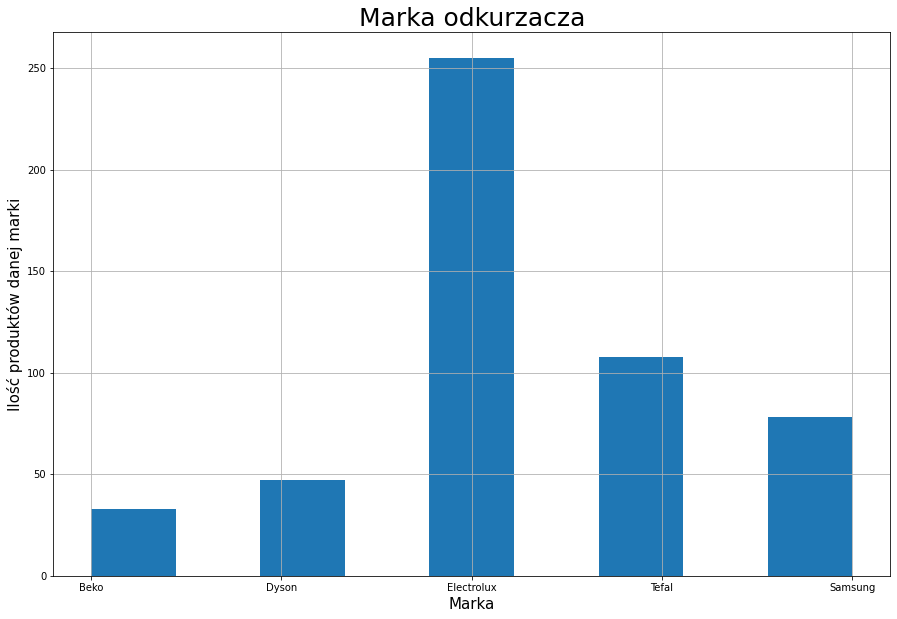

Electrolux    255
Tefal         108
Samsung        78
Dyson          47
Beko           33
Name: Marka, dtype: int64


In [104]:
plot_hist(df, 'Marka', 9, "Marka odkurzacza", "Marka", "Ilość produktów danej marki")
print(df.Marka.value_counts())

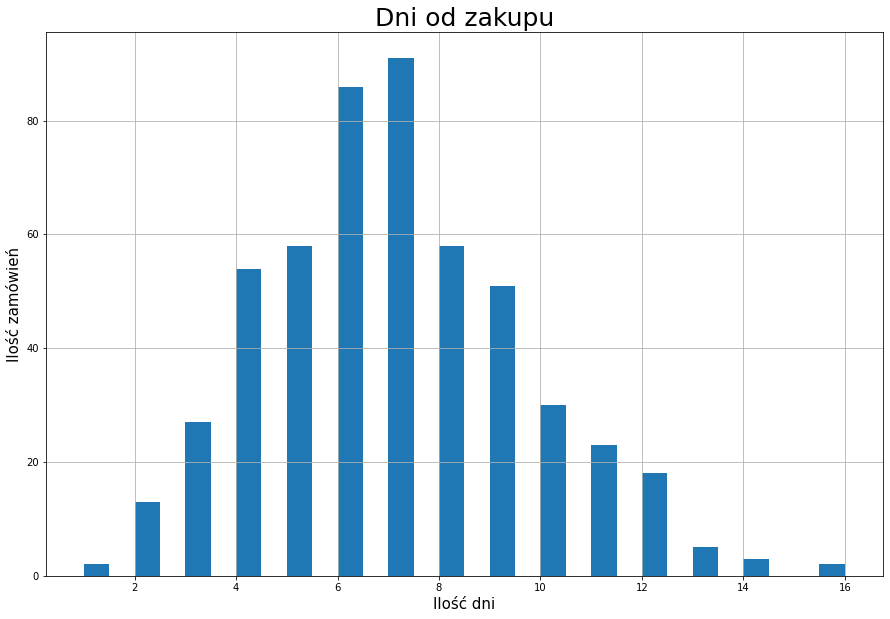

7     91
6     86
8     58
5     58
4     54
9     51
10    30
3     27
11    23
12    18
2     13
13     5
14     3
16     2
1      2
Name: Dni od zakupu, dtype: int64


In [105]:
plot_hist(df, 'Dni od zakupu', 30, "Dni od zakupu", "Ilość dni", "Ilość zamówień")
print(df["Dni od zakupu"].value_counts())

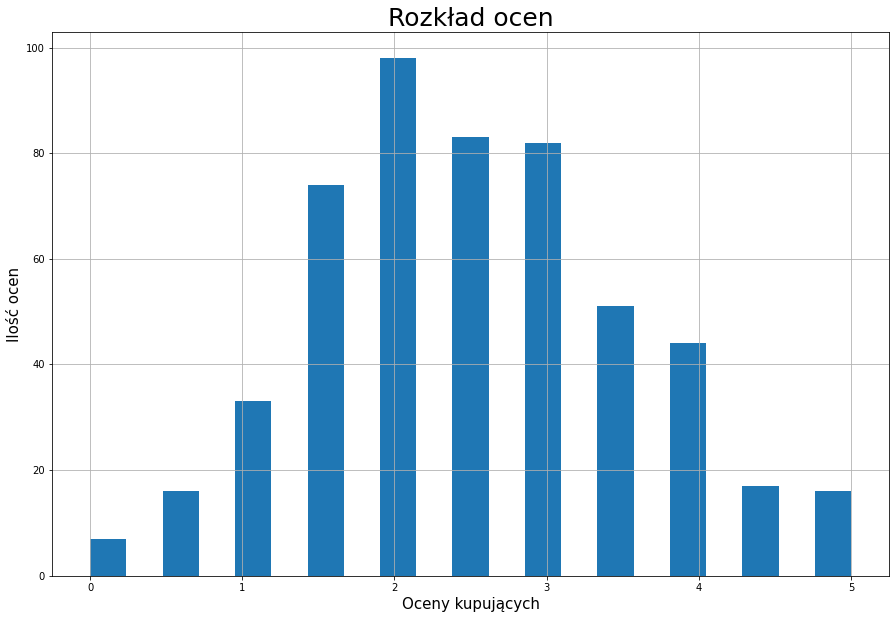

2.0    98
2.5    83
3.0    82
1.5    74
3.5    51
4.0    44
1.0    33
4.5    17
5.0    16
0.5    16
0.0     7
Name: Ocena, dtype: int64


In [106]:
plot_hist(df, 'Ocena', 21, "Rozkład ocen", "Oceny kupujących", "Ilość ocen")
print(df["Ocena"].value_counts())

K    198
M    186
Name: Płeć kupującego, dtype: int64


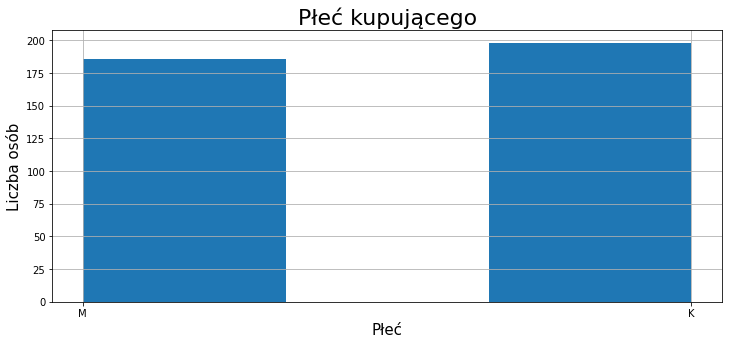

In [107]:
fig, ax = plt.subplots(1, figsize=(12, 5))
df["Płeć kupującego"].hist(bins=3)
plt.title("Płeć kupującego", fontsize=22)
plt.xlabel("Płeć", fontsize=15)
plt.ylabel("Liczba osób", fontsize=15)
plt.savefig(documents_path + "/Płeć.png")
print(df["Płeć kupującego"].value_counts())

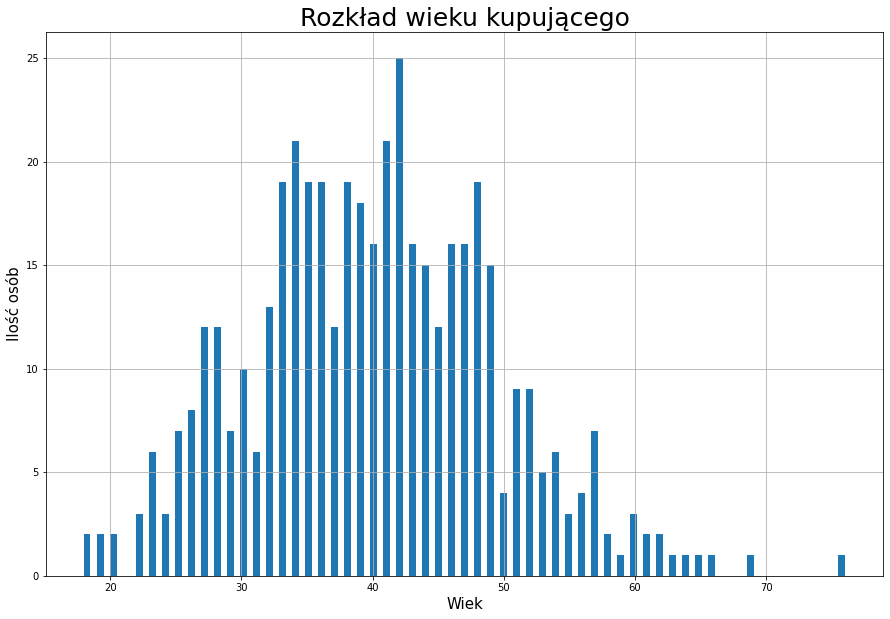

42.0    25
41.0    21
34.0    21
35.0    19
33.0    19
38.0    19
48.0    19
36.0    19
39.0    18
47.0    16
43.0    16
46.0    16
40.0    16
44.0    15
49.0    15
32.0    13
28.0    12
37.0    12
45.0    12
27.0    12
30.0    10
51.0     9
52.0     9
26.0     8
57.0     7
25.0     7
29.0     7
54.0     6
23.0     6
31.0     6
53.0     5
50.0     4
56.0     4
22.0     3
55.0     3
60.0     3
24.0     3
62.0     2
61.0     2
19.0     2
20.0     2
18.0     2
58.0     2
69.0     1
59.0     1
64.0     1
63.0     1
66.0     1
65.0     1
76.0     1
Name: Wiek kupującego, dtype: int64


In [108]:
plot_hist(df, 'Wiek kupującego', 117, "Rozkład wieku kupującego", "Wiek", "Ilość osób")
print(df["Wiek kupującego"].value_counts())

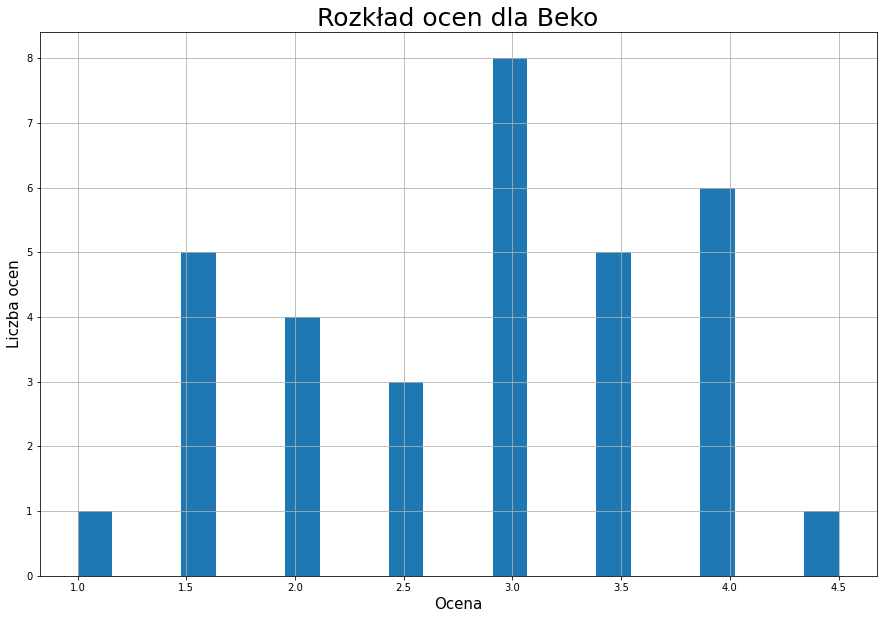

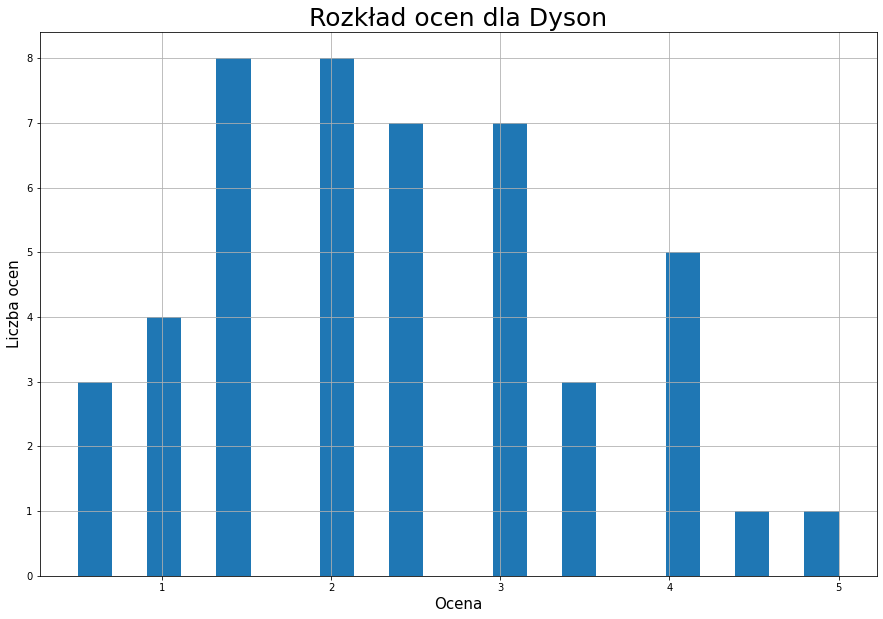

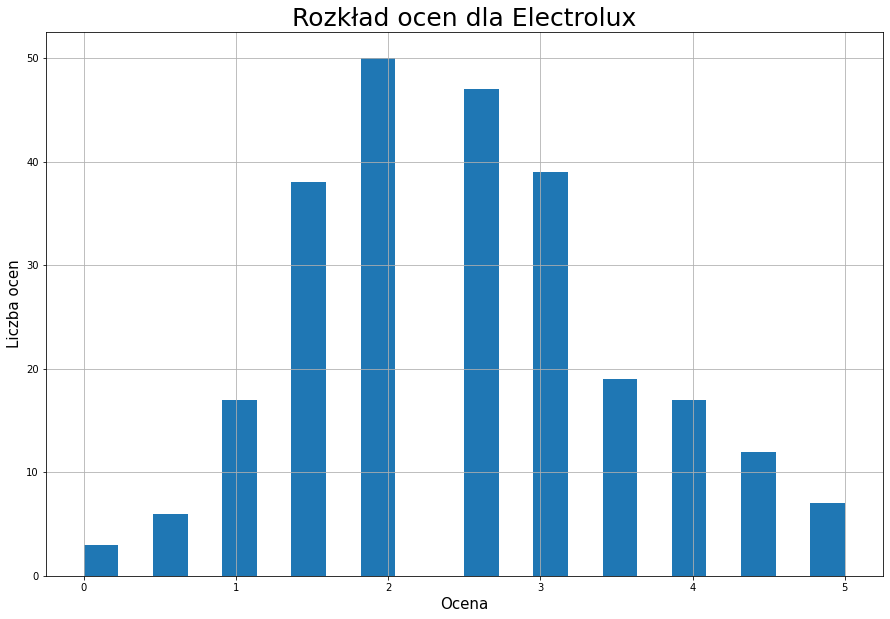

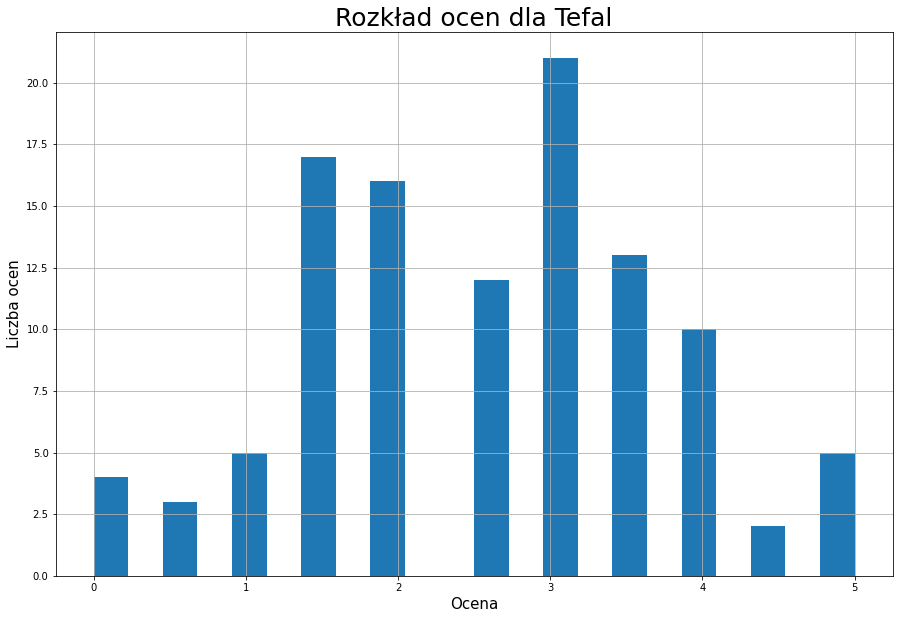

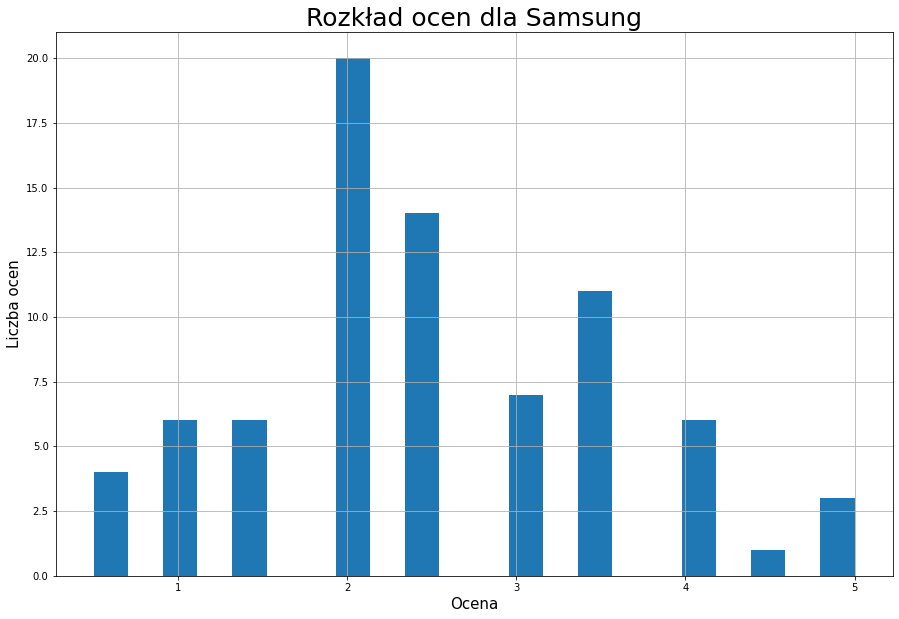

In [113]:
# Histogram dla poszczegolnych marek wg oceny
marki = df['Marka'].unique().tolist()
marki

df_lst = []

for i in range(0, len(marki)):
    df_marki = df.loc[df['Marka'] == marki[i]]
    df_lst.append(df_marki)

for i in range(0, len(df_lst)):
    plot_hist(df_lst[i], 'Ocena', bins=22, title=f"Rozkład ocen dla {marki[i]}", x_label="Ocena", y_label="Liczba ocen")

## Wnioski:
Ćwiczenia pozwoliły przygotowanie Data appendix i opisu matedanych dla przypisanego zbioru danych. W moim przypadku był zestaw danych 3_LUBUSKIE.csv. Miałam okazje na odpowiednie uporządkowanie przypisanych danych oraz ich prezentację na stosownych wykresach.